<a href="https://colab.research.google.com/github/saian65/Neural-Networks/blob/CV/PyTorch_MNISTNet_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import random
import numpy as np

In [18]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [19]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [20]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [21]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [22]:
X_train.shape

torch.Size([60000, 28, 28])

In [23]:
y_train.shape

torch.Size([60000])

In [24]:
X_train = X_train.float()
X_test = X_test.float()

In [25]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [26]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

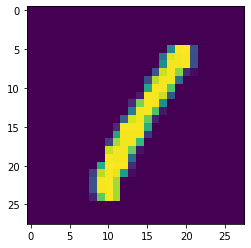

tensor(1)


In [27]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3, :, :])
plt.show()
print(y_train[3])

In [28]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [29]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [30]:
# torch.cuda.is_available()

In [31]:
# !nvidia-smi

In [32]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

In [50]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2)

In [51]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9622)
tensor(0.9627)
tensor(0.9626)
tensor(0.9623)
tensor(0.9625)
tensor(0.9638)
tensor(0.9622)
tensor(0.9628)
tensor(0.9635)
tensor(0.9626)
tensor(0.9626)
tensor(0.9627)
tensor(0.9635)
tensor(0.9633)
tensor(0.9625)
tensor(0.9639)
tensor(0.9633)
tensor(0.9622)
tensor(0.9620)
tensor(0.9627)
tensor(0.9637)
tensor(0.9635)
tensor(0.9622)
tensor(0.9629)
tensor(0.9624)
tensor(0.9628)
tensor(0.9638)
tensor(0.9629)
tensor(0.9630)
tensor(0.9629)
tensor(0.9629)


KeyboardInterrupt: ignored

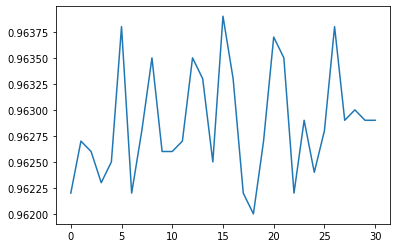

In [52]:
plt.plot(test_accuracy_history)

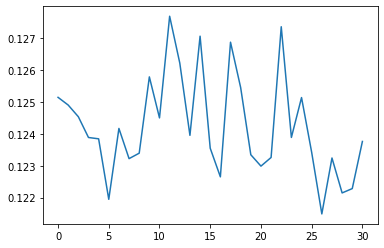

In [53]:
plt.plot(test_loss_history);